In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, Dense

In [ ]:

(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

X_train= X_train/255
X_test= X_test/255

y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [ ]:
X_train= X_train[..., tf.newaxis]
X_test= X_test[..., tf.newaxis]

In [ ]:
model= models.Sequential([layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation="relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation='relu'),
                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(10, activation='relu')])
model.compile(optimizer=Adam(learning_rate=0.00005) ,loss='mean_squared_error',metrics=['accuracy'])


model_de= Sequential()
model_de.add(Flatten(input_shape=(28,28)))
model_de.add(Dense(1024, activation="relu"))
model_de.add(Dropout(0.25))
model_de.add(Dense(512,activation="relu"))
model_de.add(Dropout(0.25))
model_de.add(Dense(10, activation='softmax'))
model_de.compile(optimizer=Adam(learning_rate=0.00005) ,loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
konw=model.fit(X_train, y_train, epochs=5, batch_size=37, validation_data=(X_test, y_test))

Epoch 1/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.6805 - loss: 0.0428 - val_accuracy: 0.6943 - val_loss: 0.0411
Epoch 2/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 114s 35ms/step - accuracy: 0.7018 - loss: 0.0397 - val_accuracy: 0.7048 - val_loss: 0.0391
Epoch 3/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 88s 39ms/step - accuracy: 0.7125 - loss: 0.0377 - val_accuracy: 0.7144 - val_loss: 0.0376
Epoch 4/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - accuracy: 0.7193 - loss: 0.0366 - val_accuracy: 0.7180 - val_loss: 0.0368
Epoch 5/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7240 - loss: 0.0356 - val_accuracy: 0.7213 - val_loss: 0.0363


In [ ]:
clasic=model_de.fit(X_train, y_train, epochs=5, batch_size=37, validation_data=(X_test, y_test))

Epoch 1/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7060 - loss: 0.0418 - val_accuracy: 0.8366 - val_loss: 0.0238
Epoch 2/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8410 - loss: 0.0236 - val_accuracy: 0.8499 - val_loss: 0.0219
Epoch 3/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8625 - loss: 0.0204 - val_accuracy: 0.8623 - val_loss: 0.0202
Epoch 4/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8699 - loss: 0.0192 - val_accuracy: 0.8698 - val_loss: 0.0192
Epoch 5/5
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.8758 - loss: 0.0183 - val_accuracy: 0.8652 - val_loss: 0.0194


Po porównaniu obydwu podejść możą jasno stwierdzić iż do 3 epkka w modelu Dense jest wyraźny wzrost dokładności. Lecz w następnych fazach już takiego wzrostu nie ma co więcej można przyjąć założenie iż stosunkowo szybko doszło do jego przeuczenia. Co tyczy się z koleji podejścia konwolycjnego należy zauważyć iż nie doszło do przeuczenia modelu a wzrost dojładności jest wolniejszy ale stały uważam że moge przyjąć założenie iż to podejście powinno nam zapewnić przy większej ilości epok znacznie wyszą dokładność co będzie rekopenskowało dłuszy czas jaki należy poświęcić na wyszkolenie tego modelu



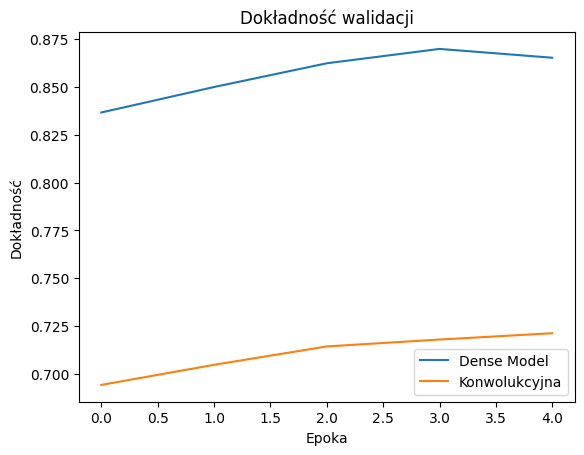

In [24]:
plt.plot(clasic.history['val_accuracy'], label='Dense Model')
plt.plot(konw.history['val_accuracy'], label='Konwolukcyjna')

plt.title('Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()